## Vision Systems in Agriculture (Part 1)

### Section 1: Image Representation (Images as Arrays)
We define how images are represented as arrays

#### 1.1 Import relevant Python packages

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

#### 1.2 Load and display an image

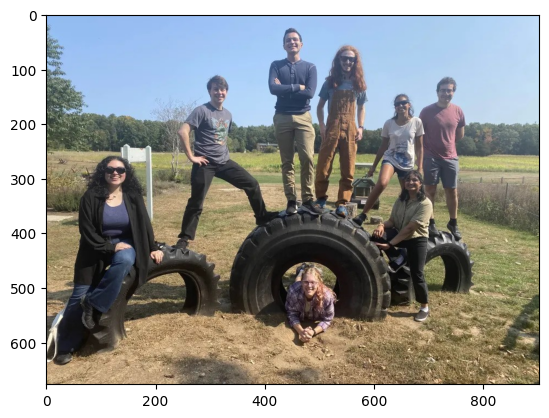

In [2]:
path_to_image = './img/class-crew.jpg'

# read the image from the directory
img = cv.imread(path_to_image)

# Convert from BGR (OpenCV's default) to RGB (Matplotlib's default)
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# display image
plt.imshow(img_rgb)
plt.show()

#### 1.3 Explore image properties

In [3]:
print('Image properties:')
print(f'Image type: {type(img_rgb)}')
print(f'Image shape: {img_rgb.shape}')
print(f'Image size: {img_rgb.size}')


Image properties:
Image type: <class 'numpy.ndarray'>
Image shape: (677, 903, 3)
Image size: 1833993


### Section 2: Basic Image Processing

1. Image cropping
2. Image resizing
3. Splitting image channels
4. Merging image channels
5. Converting to different color spaces
6. Pixel value distribution (image histogram)

1. Image cropping

Cropped image shape: (60, 60, 3)


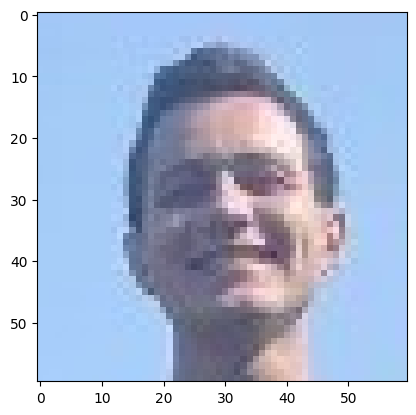

In [4]:
# TODO: Try to isolate Luke head!!

img_cropped = img_rgb[20:80, 420:480]
plt.imshow(img_cropped)
print(f'Cropped image shape: {img_cropped.shape}')

2. Resize image

Original image shape: (677, 903, 3)
Resized image shape: (335, 450, 3)


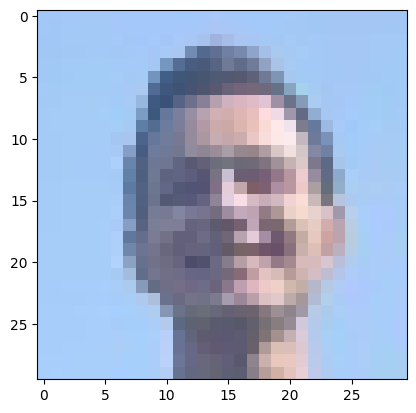

In [5]:
# TODO: Explore the cv.resize function

img_resize = cv.resize(img_rgb, (450, 335))
luke_resize = cv.resize(img_cropped, (30, 30))

print(f'Original image shape: {img_rgb.shape}')
print(f'Resized image shape: {img_resize.shape}')

plt.imshow(img_resize)
plt.imshow(luke_resize)

3. Splitting the image channels

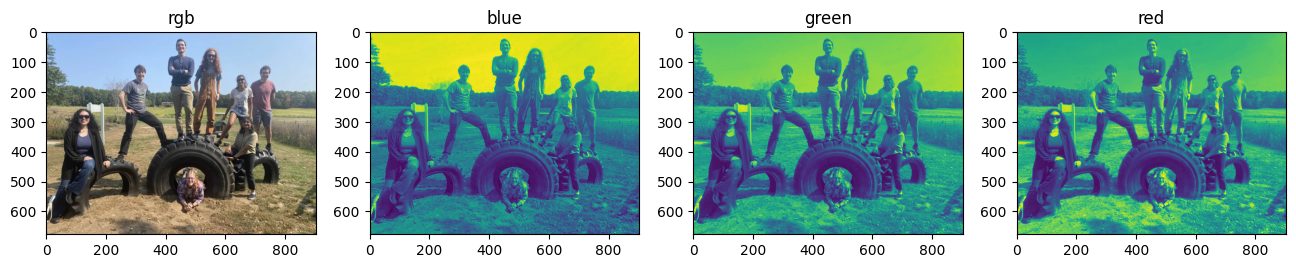

In [6]:
#TODO: RGB images have three (3) channels, use cv.split to isolate each channel and then display them all

r, g, b= cv.split(img_rgb)
channels = [b, g, r]
titles = ['rgb', 'blue', 'green', 'red']

plt.figure(figsize=(16, 6))
plt.subplot(1,4,1)
plt.imshow(img_rgb), plt.title(titles[0])

for i in range(len(channels)):
    plt.subplot(1,4,i+2)
    plt.imshow(channels[i])
    plt.title(titles[i+1])

plt.show()

4. Merging image channels

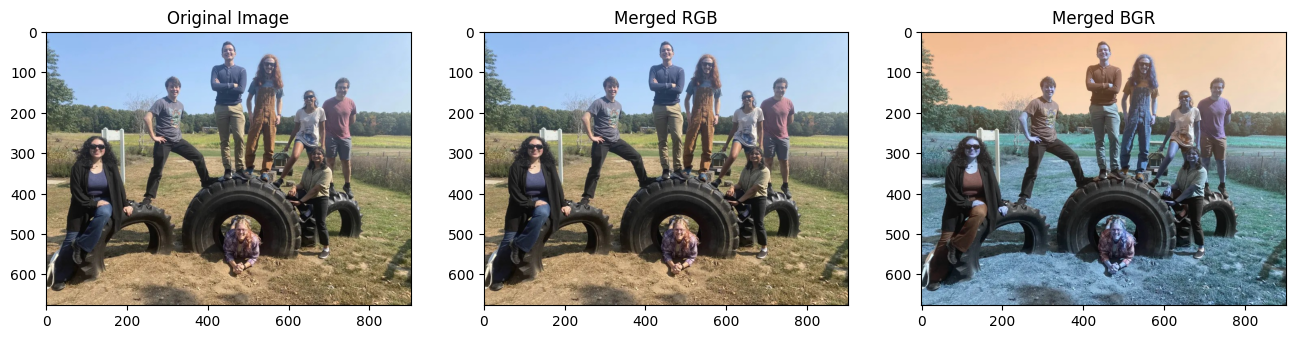

In [7]:
#TODO: What can be split can be merged. Use the cv.merge function to merge the individual channels together

merged_img_rgb = cv.merge([r, g, b])
merged_img_bgr = cv.merge([b, g, r])

#TODO: Does the order of merging matter? Find out!

titles = ['Original Image', 'Merged RGB', 'Merged BGR']
plt.figure(figsize=(16, 6))
plt.subplot(1,3,1)
plt.imshow(img_rgb), plt.title(titles[0])
plt.subplot(1,3,2)
plt.imshow(merged_img_rgb), plt.title(titles[1])
plt.subplot(1,3,3)
plt.imshow(merged_img_bgr), plt.title(titles[2])
# plt.subplot(2,3,1)
# plt.imshow(img_rgb), plt.title(titles[0])
# plt.subplot(2,3,2)
# plt.imshow(merged_img_rgb), plt.title(titles[1])
# plt.subplot(2,3,3)
# plt.imshow(merged_img_bgr), plt.title(titles[2])

plt.show()

5. Converting to different color spaces

In [8]:
#TODO: Explore different color spaces. Plot the original image in at least 3 other color spaces

# Reference: https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html



6. Pixel value distribution

Min and Max pixel values are: [0, 255]


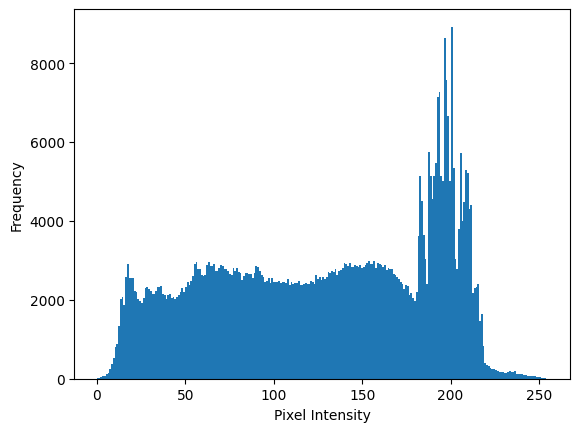

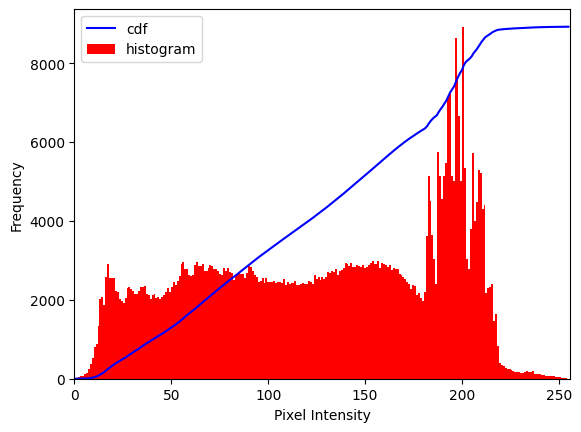

In [9]:
# TODO: Every pixel has a value (0, 255), let's explore the pixel value distribution

# TODO: 1. convert to grayscale
img_gray = cv.cvtColor(img_rgb, cv.COLOR_RGB2GRAY)


# TODO: 2. find the min and max pixel value
print(f'Min and Max pixel values are: [{np.min(img_gray)}, {np.max(img_gray)}]')


# TODO: 3. create and plot the pixel value distribution as an image histogram
histSize = 256
histRange = (0, 255)
plt.hist(img_gray.flatten(), bins=histSize, range=histRange, alpha=1)
plt.xlabel('Pixel Intensity'), plt.ylabel('Frequency')
plt.show()

# TODO: 4. determine the cumulative distribution and plot it against the pixel value distribution
hist, bins = np.histogram(img_gray.flatten(), histSize, histRange)
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img_gray.flatten(), bins=histSize, range=histRange, alpha=1, color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.xlabel('Pixel Intensity'), plt.ylabel('Frequency')
plt.show()


### Section 3: Image Enhancement

1. Histogram equalization
2. Filtering

#### 1. Histogram equalization

Resource: https://docs.opencv.org/4.x/d5/daf/tutorial_py_histogram_equalization.html

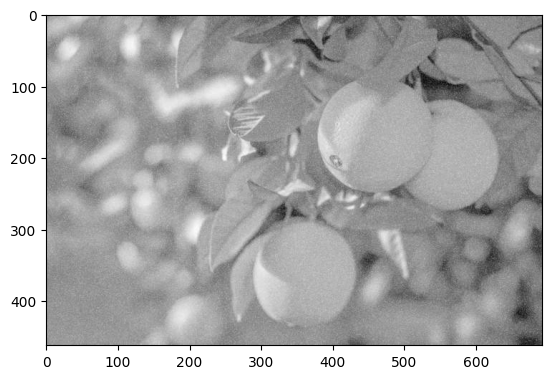

In [10]:
# import orange image file: 'orange.jpg'
img_gray = cv.imread('.//img//noisy-oranges.jpg', cv.IMREAD_GRAYSCALE)

plt.imshow(img_gray, cmap='gray')


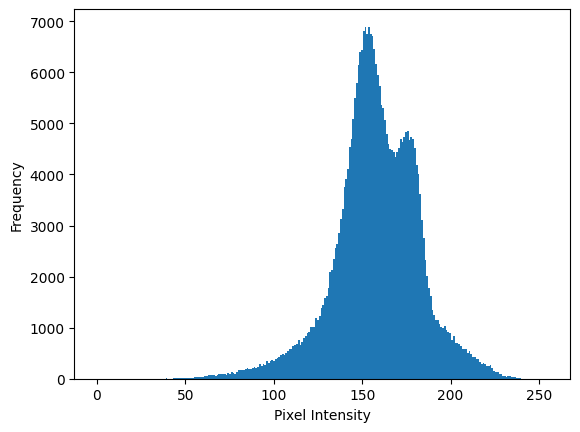

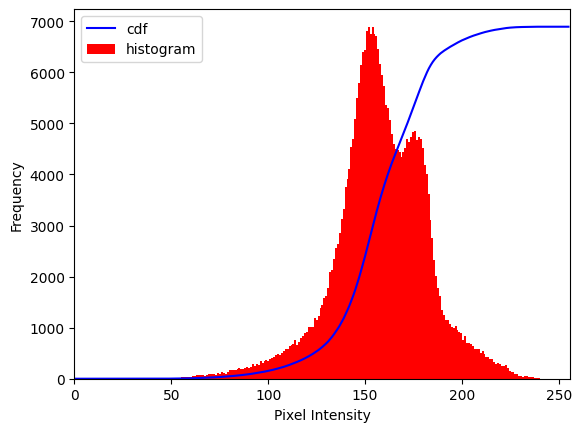

In [11]:
# TODO: Compute and plot the histogram and the cummulative distribution (use similar code as above)

histSize = 256
histRange = (0, 255)
plt.hist(img_gray.flatten(), bins=histSize, range=histRange, alpha=1)
plt.xlabel('Pixel Intensity'), plt.ylabel('Frequency')
plt.show()

hist, bins = np.histogram(img_gray.flatten(), histSize, histRange)
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img_gray.flatten(), bins=histSize, range=histRange, alpha=1, color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.xlabel('Pixel Intensity'), plt.ylabel('Frequency')
plt.show()


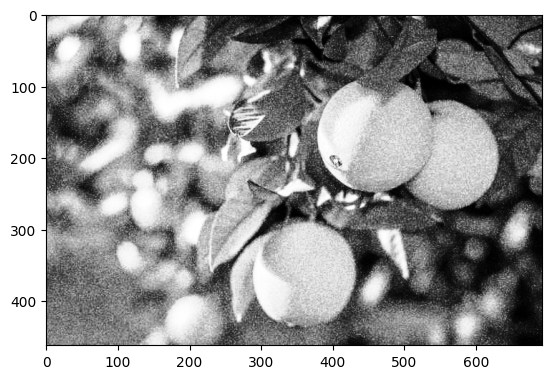

In [12]:
# TODO: Using the cv.equalizeHist, perform histogram equalization and plot the result
equ = cv.equalizeHist(img_gray)
plt.imshow(equ, cmap='gray')
# plt.imshow(equ)


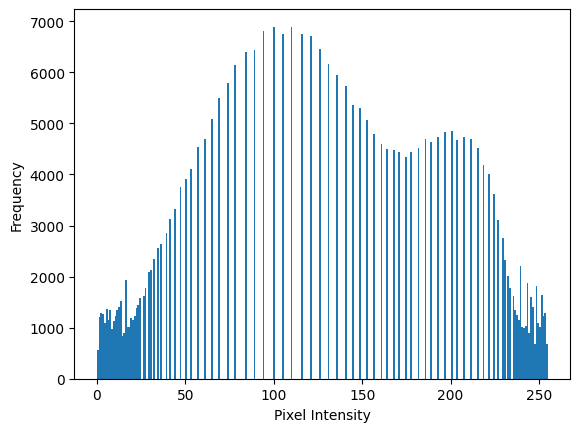

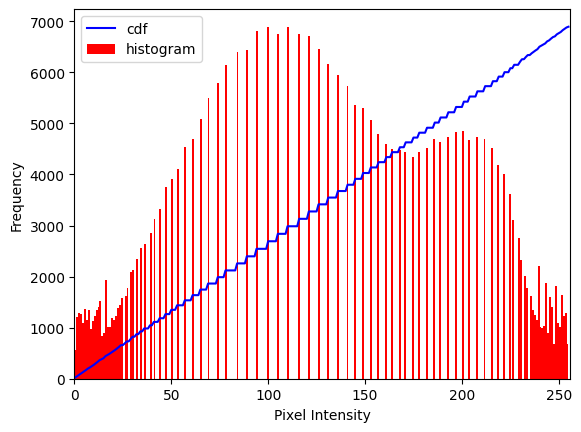

In [13]:
# TODO: Compute and plot the histogram and the cummulative distribution of the equalized image (use similar code as above)

histSize = 256
histRange = (0, 255)
plt.hist(equ.flatten(), bins=histSize, range=histRange, alpha=1)
plt.xlabel('Pixel Intensity'), plt.ylabel('Frequency')
plt.show()

hist, bins = np.histogram(equ.flatten(), histSize, histRange)
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(equ.flatten(), bins=histSize, range=histRange, alpha=1, color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.xlabel('Pixel Intensity'), plt.ylabel('Frequency')
plt.show()


#### 2. Image Filtering (smoothing)


(([], []), ([], []))

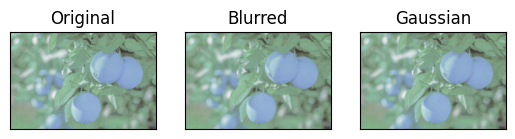

In [14]:
# Resource: https://docs.opencv.org/3.4/d4/d13/tutorial_py_filtering.html 
img = cv.imread('.//img//noisy-oranges.jpg')

# TODO: Play around with different filters to get a good outcome
blur = cv.blur(img,(5,5))
gauss_blur = cv.GaussianBlur(img,(5,5),0)
plt.subplot(1, 3, 1),plt.imshow(img, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(1, 3, 2),plt.imshow(blur, cmap='gray'),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.subplot(1, 3, 3),plt.imshow(gauss_blur, cmap='gray'),plt.title('Gaussian')
plt.xticks([]), plt.yticks([])

### Section 4. Pixel-wise Image Segmentation

1. Monochrome image classification (manual approach)
2. Monochrome image classification (adaptive approach and Otsu)
3. Color image classification


1. Monochrome image classification (manual approach)

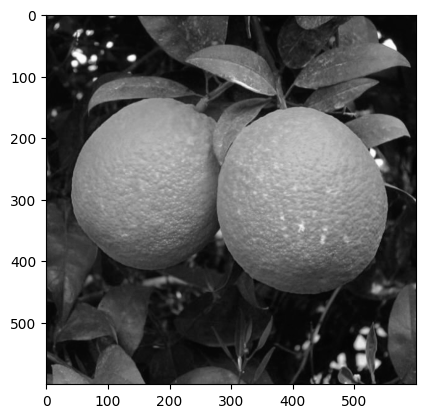

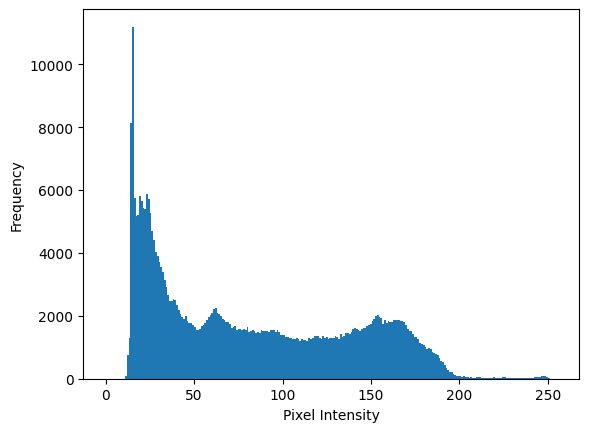

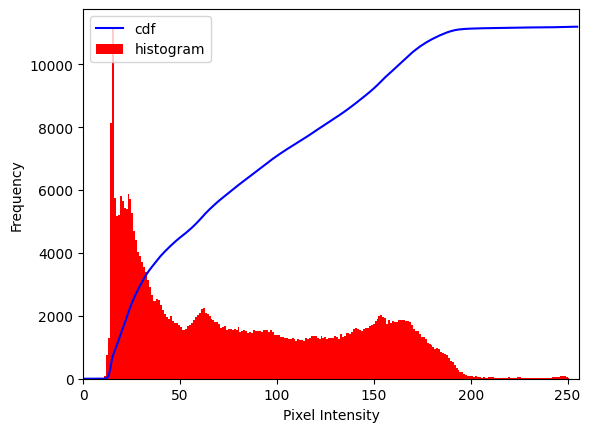

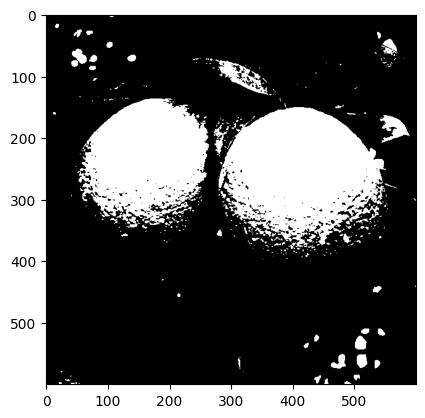

In [15]:
# Resource: https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html

# TODO: Import orange.jpg 
or_img = cv.imread('./img/orange.jpg')
disp_orange = cv.cvtColor(or_img, cv.COLOR_RGB2BGR)
orange = cv.cvtColor(or_img, cv.COLOR_RGB2GRAY)

plt.imshow(orange, cmap="gray")
plt.show()

# TODO: Inspect the pixel value distribution to determine a good threshold
histSize = 256
histRange = (0, 255)
plt.hist(orange.flatten(), bins=histSize, range=histRange, alpha=1)
plt.xlabel('Pixel Intensity'), plt.ylabel('Frequency')
plt.show()

hist, bins = np.histogram(orange.flatten(), histSize, histRange)
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(orange.flatten(), bins=histSize, range=histRange, alpha=1, color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.xlabel('Pixel Intensity'), plt.ylabel('Frequency')
plt.show()


# TODO: Use cv.threshold to apply a binary threshold on the image and plot the outcome 
ret,thresh1 = cv.threshold(orange,140, 255,cv.THRESH_BINARY)
plt.imshow(thresh1, cmap='gray')


2. Monochrome image classification (adaptive approach and Otsu)

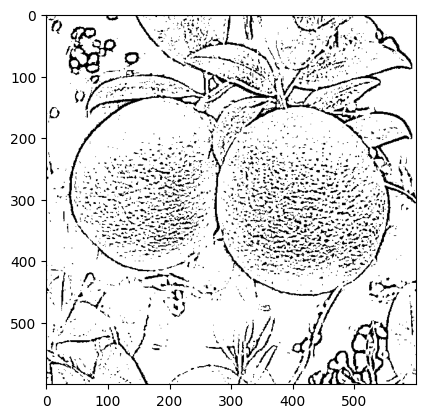

In [16]:
# Resource: https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html

# TODO: Use cv.adaptiveThreshold to apply a binary threshold on the image and plot the outcome
th2 = cv.adaptiveThreshold(orange,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,9,8)
# original values were 11 and 2
plt.imshow(th2, cmap='gray')

91.0


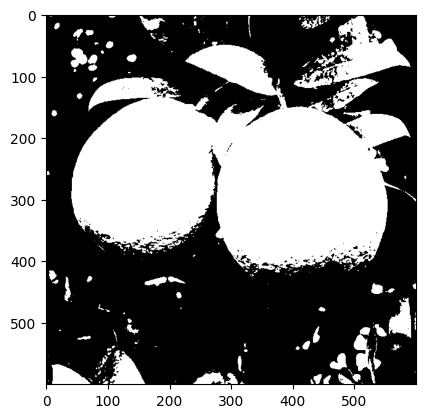

In [17]:
# Resource: https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html

# TODO: Use the otsu method to apply a binary threshold on the image and plot the outcome

ret2,th2 = cv.threshold(orange,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
plt.imshow(th2, cmap='gray')
print(ret2)

# TODO: What are your observations?
# This works better than all the previous ones in terms of separating out the image. However, with only this method I could see it getting mixed up with the leaves.

3. Color image classification

Resource: https://realpython.com/python-opencv-color-spaces/ 

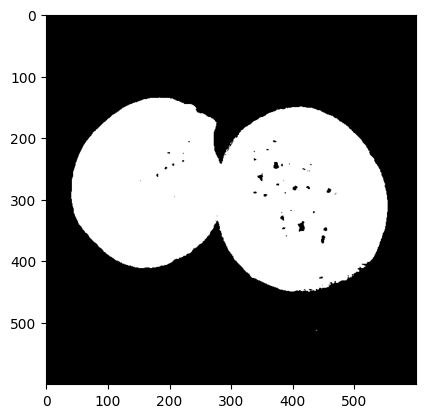

In [18]:
# TODO: Follow the resource above to define a color mask
orange_hsv = cv.cvtColor(or_img, cv.COLOR_BGR2HSV)
# plt.imshow(orange_hsv)
# plt.show()

min_color =  (8, 100, 140)
max_color = (30, 255, 255)
mask = cv.inRange(orange_hsv, min_color, max_color)

plt.imshow(mask, cmap='gray')
plt.show()
# orange_small = orange_hsv[100:400, 50:200]
# plt.imshow(orange_small)
# print(orange_small)


91.0


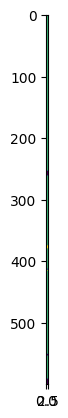

In [19]:
# TODO: Could you apply the Otsu approach to this as well? Give it a try.

# ret3,th3 = cv.threshold(orange_hsv[:,0],0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# plt.imshow(th3)
print(ret2)
mask2 = cv.inRange(orange_hsv[:,0], 0, ret2)
plt.imshow(mask2)

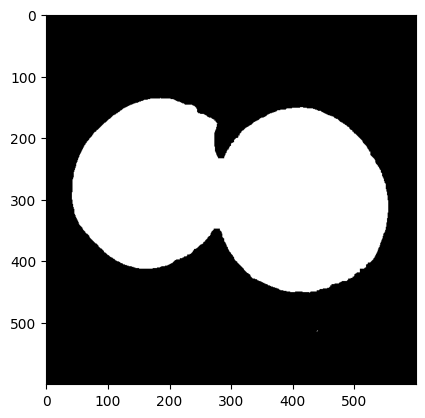

In [20]:
# TODO: Morphological operations are super helpful in denoising and rounding out your mask.
# Resource: https://docs.opencv.org/4.x/d9/d61/tutorial_py_morphological_ops.html

kernel = np.ones((10,10),np.uint8)
closing = cv.morphologyEx(mask, cv.MORPH_CLOSE, kernel)
plt.imshow(closing, cmap='gray')

4. Bounding box and segmentation visualization

(600, 600, 3)
(600, 600, 3)


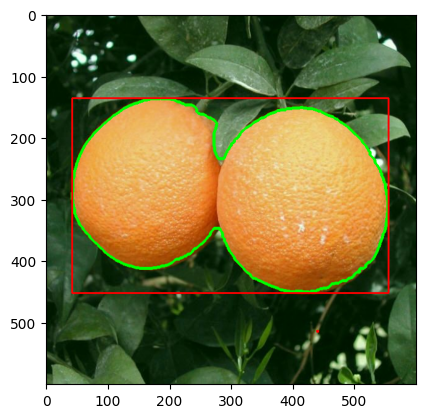

In [21]:
# TODO: Use a combination of cv.findContours, cv.drawContours and OpenCV's bitwise operations to obtain a bounding box and segmentation visualization
#  as in the image below.

contours, _ = cv.findContours(closing, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE) 
bounding = cv.drawContours(disp_orange, contours, -1, (0, 255, 0), 3)
result = cv.bitwise_and(disp_orange, bounding)
print(disp_orange.shape)
print(bounding.shape)

orange_copy = disp_orange.copy()

prediction_bbox = []
for contour in contours:
    x, y, w, h = cv.boundingRect(contour)
    prediction_bbox.append([x, y, x + w, y + h])

for pd in prediction_bbox:
    pd = [int(v) for v in pd]
    cv.rectangle(orange_copy, (pd[0], pd[1]), (pd[2], pd[3]), (255, 0, 0), 2)

plt.imshow(orange_copy)
plt.show()



## Example Solution

<img src=".\img\solution1.png" width="800">

<img src=".\img\solution2.png" width="400">


#### TODO
1. Generate an object detection solution for "orange.jpg" AND either "orange-2.jpg" or "orange-3.jpg" 
2. Generate a plot showing the prediction vs the ground truth for each image
3. Calculate the evaluation metric (mean average precision) for each image

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
ground_truths = [[41.0, 137.0, 554.0, 454.0]]
predictions = [[439, 513, 441, 515], [42, 136, 555, 452]]


Text(0.5, 1.0, 'Ground truth vs predicted Bbox')

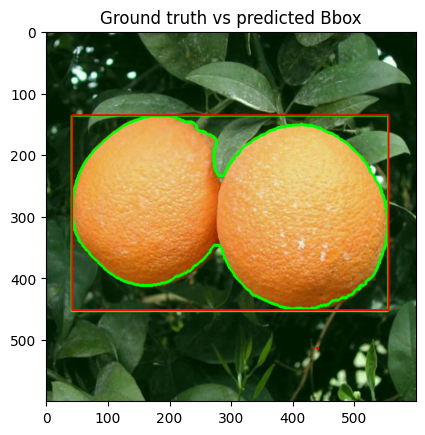

In [38]:
from helpers import get_ground_truth_ann, calculate_map

# Our goal here is to evaluate the segmentation and object detection prediction against ground truth data for the image

img2 = cv.imread('img/orange-2.jpg')


# TODO: Use cv.boundingRect to get the bounding box info from the contour you generated above

prediction_bbox = []
for contour in contours:
    x, y, w, h = cv.boundingRect(contour)
    prediction_bbox.append([x, y, x + w, y + h])

# Here we have provided a helper function to extract the ground truth bbox for the images
image_name = 'orange'
ground_truth_bbox = get_ground_truth_ann(image_name=image_name, show=False)

print(f'ground_truths = {ground_truth_bbox}')
print(f'predictions = {prediction_bbox}')

# img = disp_orange
# plt.imshow(img)

# # TODO: plot the results
img_bbox = disp_orange.copy()

for gt in ground_truth_bbox:
    gt = [int(v) for v in gt]
    cv.rectangle(img_bbox, (gt[0], gt[1]), (gt[2], gt[3]), (0, 255, 0), 2)

for pd in prediction_bbox:
    pd = [int(v) for v in pd]
    cv.rectangle(img_bbox, (pd[0], pd[1]), (pd[2], pd[3]), (255, 0, 0), 2)


plt.imshow(img_bbox)
plt.title("Ground truth vs predicted Bbox")


loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
ground_truths = [[116.08, 58.22, 189.87, 128.68], [232.97, 61.91, 317.08, 143.57], [295.98, 5.53, 370.18, 80.6], [371.79, 44.12, 438.57000000000005, 102.11], [123.96, 147.75, 200.23, 221.53], [221.37, 165.16, 301.74, 244.32999999999998], [327.9, 168.06, 395.04999999999995, 235.21], [329.1, 244.7, 399.15000000000003, 288.0], [211.79, 262.57, 261.95, 288.0], [211.79, 221.91, 266.96, 259.67]]
predictions = [[36, 669, 61, 683], [14, 659, 16, 662], [838, 657, 893, 683], [786, 656, 790, 658], [792, 655, 793, 656], [54, 655, 56, 656], [537, 653, 560, 661], [309, 630, 338, 660], [305, 626, 308, 629], [823, 624, 844, 642], [0, 599, 8, 614], [230, 591, 241, 602], [11, 588, 71, 649], [6, 577, 7, 579], [773, 574, 779, 580], [74, 574, 80, 577], [775, 563, 776, 564], [55, 563, 64, 571], [743, 559, 763, 591], [250, 559, 256, 566], [277, 555, 280, 559], [87, 554, 247, 683], [151, 545, 154, 547], [13, 545, 22, 567], [174

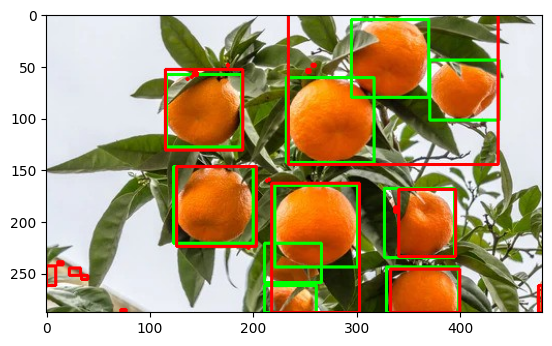

In [70]:
# object detection solution

img_name = 'orange-3'
img = cv.imread(f'./img/{img_name}.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)
# img_gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

# ret2,th2 = cv.threshold(orange,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

min_color =  (8, 100, 140)
max_color = (30, 255, 255)
mask = cv.inRange(img_hsv, min_color, max_color)

kernel = np.ones((10,10),np.uint8)
closing = cv.morphologyEx(mask, cv.MORPH_CLOSE, kernel)

contours, _ = cv.findContours(closing, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE) 
# bounding = cv.drawContours(img, contours, -1, (0, 255, 0), 3)
# result = cv.bitwise_and(img, bounding)

ground_truth_bbox = get_ground_truth_ann(image_name=img_name, show=False)

print(f'ground_truths = {ground_truth_bbox}')
print(f'predictions = {prediction_bbox}')

img_bbox = img.copy()

prediction_bbox = []
for contour in contours:
    x, y, w, h = cv.boundingRect(contour)
    prediction_bbox.append([x, y, x + w, y + h])

for gt in ground_truth_bbox:
    gt = [int(v) for v in gt]
    cv.rectangle(img_bbox, (gt[0], gt[1]), (gt[2], gt[3]), (0, 255, 0), 2)


for pd in prediction_bbox:
    pd = [int(v) for v in pd]
    cv.rectangle(img_bbox, (pd[0], pd[1]), (pd[2], pd[3]), (255, 0, 0), 2)

plt.imshow(img_bbox)
plt.show()



In [71]:
# TODO: Use the calculate_map helper function to calculate the average precision of your object detection pipeline
mAP = calculate_map(ground_truth_bbox, prediction_bbox, iou_threshold=0.7)
print(mAP)

iou_max = 0
precisions = [0.0], recalls = [0.0]
iou_max = 0
precisions = [0.0, 0.0], recalls = [0.0, 0.0]
iou_max = 0
precisions = [0.0, 0.0, 0.0], recalls = [0.0, 0.0, 0.0]
iou_max = 0.90684392435456
precisions = [0.0, 0.0, 0.0, 0.25], recalls = [0.0, 0.0, 0.0, 0.1]
iou_max = 0
precisions = [0.0, 0.0, 0.0, 0.25, 0.2], recalls = [0.0, 0.0, 0.0, 0.1, 0.1]
iou_max = 0
precisions = [0.0, 0.0, 0.0, 0.25, 0.2, 0.16666666666666666], recalls = [0.0, 0.0, 0.0, 0.1, 0.1, 0.1]
iou_max = 0
precisions = [0.0, 0.0, 0.0, 0.25, 0.2, 0.16666666666666666, 0.14285714285714285], recalls = [0.0, 0.0, 0.0, 0.1, 0.1, 0.1, 0.1]
iou_max = 0
precisions = [0.0, 0.0, 0.0, 0.25, 0.2, 0.16666666666666666, 0.14285714285714285, 0.125], recalls = [0.0, 0.0, 0.0, 0.1, 0.1, 0.1, 0.1, 0.1]
iou_max = 0.003875616397948293
precisions = [0.0, 0.0, 0.0, 0.25, 0.2, 0.16666666666666666, 0.14285714285714285, 0.125, 0.1111111111111111], recalls = [0.0, 0.0, 0.0, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
iou_max = 0.7718728373863217
precisio